In [32]:
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.seasonal import MSTL
from statsmodels.tsa.seasonal import DecomposeResult

from sklearn.impute import SimpleImputer

register_matplotlib_converters()
sns.set_style("darkgrid")

In [5]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)

In [6]:
# t = np.arange(1, 1000)
# daily_seasonality = 5 * np.sin(2 * np.pi * t / 24)
# weekly_seasonality = 10 * np.sin(2 * np.pi * t / (24 * 7))
# trend = 0.0001 * t**2
# y = trend + daily_seasonality + weekly_seasonality + np.random.randn(len(t))
# ts = pd.date_range(start="2020-01-01", freq="H", periods=len(t))
# df = pd.DataFrame(data=y, index=ts, columns=["y"])

In [48]:
df = pd.read_csv('../data/co2-mm-mlo_csv.csv')

In [49]:
df = df[['Decimal Date', 'Average']]

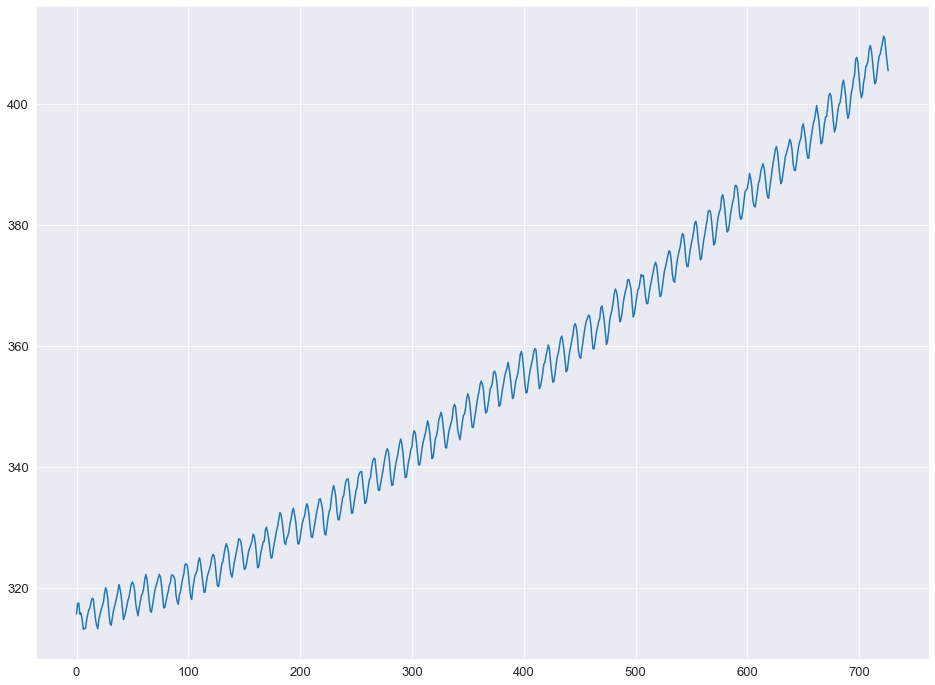

In [52]:
plt.plot(df.Average)

In [75]:
avgs = {}
best_avg = 10000000
best_i = 0
for i in range(2, 365):
    mstl = MSTL(df["Average"], periods=[12, i])
    res = mstl.fit()
    # ax = res.plot()

    print(i)
    print("Average: ", (avg := sum([abs(i) for i in res.resid])/len(res.resid)))
    print("Max: ", max([abs(i) for i in res.resid]))
    avgs[i] = avg


2
Average:  0.17512396198834304
Max:  1.213915486442204
3
Average:  0.17276529632154894
Max:  0.914322899282979
4
Average:  0.17275105275195293
Max:  0.9760322919772193
5
Average:  0.16377132497704144
Max:  0.7949129153998911
6
Average:  0.16833126873156504
Max:  0.8564210069742444
7
Average:  0.16252188241298077
Max:  0.7334301268242598
8
Average:  0.16266864813192913
Max:  0.8811352992299817
9
Average:  0.15912121465238893
Max:  0.7570603082412504
10
Average:  0.16619430847541386
Max:  0.7146608463407347
11
Average:  0.1999961919087818
Max:  1.0255429429043375
12
Average:  0.1737935455853806
Max:  1.0023730634511026
13
Average:  0.16359302871268075
Max:  0.8153466873433786
14
Average:  0.16205514535516324
Max:  0.7859224539579941
15
Average:  0.16468590242656114
Max:  0.8120927838942293
16
Average:  0.16518019925022168
Max:  0.75983416213586
17
Average:  0.1698003459622396
Max:  0.8058007345750298
18
Average:  0.17927787429581712
Max:  0.714676696590459
19
Average:  0.182377220663176

/Users/ayushpal/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stl/mstl.py:215: UserWarning: A period(s) is larger than half the length of time series. Removing these period(s).
  warnings.warn(


In [76]:
print(best_i, best_avg)

0 10000000


In [79]:
sorted(avgs.items(), key=lambda x: x[1])

[(363, 0.024131292441976218),
 (362, 0.07414816617266785),
 (361, 0.12289487115733548),
 (9, 0.15912121465238893),
 (14, 0.16205514535516324),
 (7, 0.16252188241298077),
 (8, 0.16266864813192913),
 (13, 0.16359302871268075),
 (5, 0.16377132497704144),
 (15, 0.16468590242656114),
 (16, 0.16518019925022168),
 (10, 0.16619430847541386),
 (6, 0.16833126873156504),
 (17, 0.1698003459622396),
 (360, 0.17229556736452628),
 (4, 0.17275105275195293),
 (3, 0.17276529632154894),
 (364, 0.17296382325454449),
 (12, 0.1737935455853806),
 (2, 0.17512396198834304),
 (18, 0.17927787429581712),
 (19, 0.1823772206631763),
 (21, 0.18801886378388905),
 (20, 0.18952214954696237),
 (22, 0.19490057894131035),
 (27, 0.1973730286667103),
 (23, 0.19958474727939723),
 (11, 0.1999961919087818),
 (26, 0.2030950554972014),
 (25, 0.2036019843841424),
 (24, 0.20400363372333305),
 (28, 0.20439048734089152),
 (29, 0.21026639510058825),
 (30, 0.21659365818088305),
 (359, 0.21982791319357756),
 (31, 0.22221437299181276),


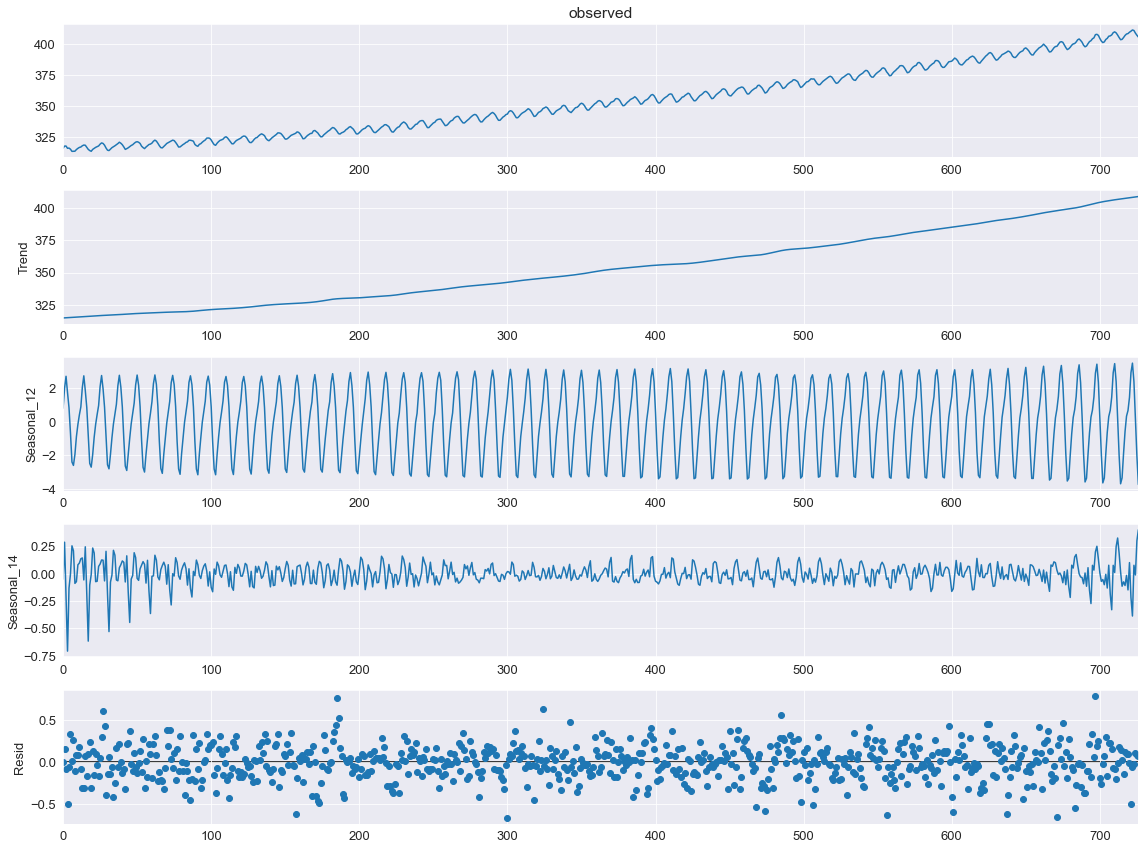

In [84]:
mstl = MSTL(df["Average"], periods=[12, 14])
res = mstl.fit()
ax = res.plot()

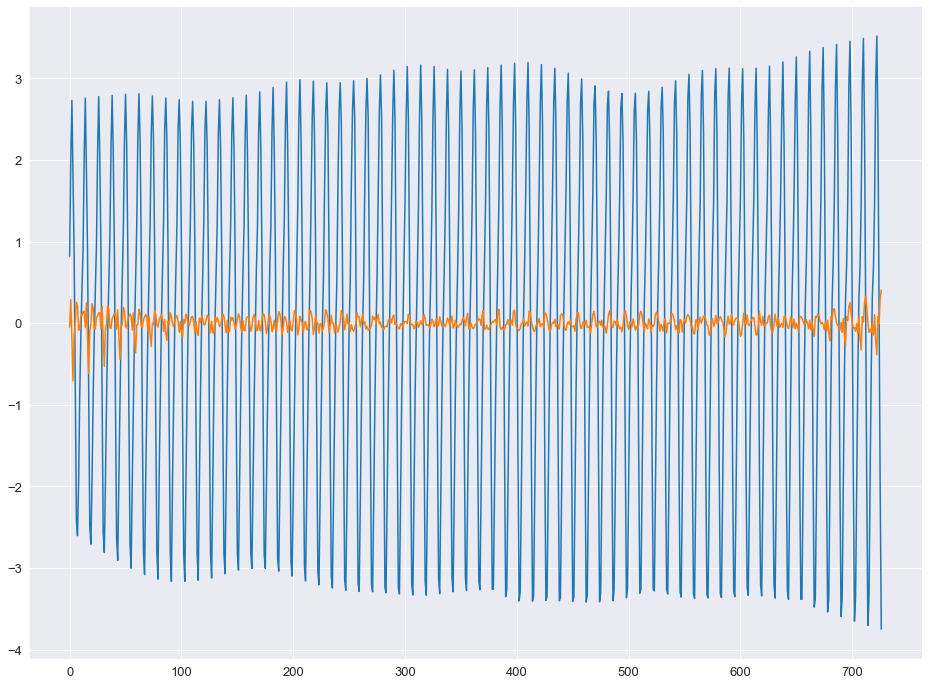

In [87]:
plt.plot(res.seasonal)

In [92]:
decomp_14_data = pd.DataFrame({
    "Observed": res.observed,
    "Trend": res.trend,
    "Ssnl12": res.seasonal.seasonal_12,
    "Ssnl14": res.seasonal.seasonal_14,
    "Residual": res.resid
})

In [96]:
decomp_14_data.to_csv("../data/decomp_14_data.csv", index=False)

In [94]:
314.927830 + 0.820885 + -0.048006 + 0.009291

315.71